# **READ BEFORE CONTINUE**

> Untuk mendapatkan akses edit kalian bisa membuat copy di perangkat kalian masing-masing dengan menggunakan akun gmail masing-masing (Menu File -> Save copy in Drive)

# **Modul 3 Pemrograman Fungsional 2025**

---
Processing Sequence Data in Functional Programming

Disusun oleh:
1. Fera Putri Ayu L., S.Kom., M.T.
2. Alfi Aulia Azzahra
3. Rahmatun Nikmah

Presented by: Tim Laboratorium Informatika Universitas Muhammadiyah Malang

# Tujuan Praktikum

<p align="justify"> Sub-CPMK 7: Mahasiswa mampu mendesain program dengan teknik yang tepat untuk menyelesaikan masalah dengan menggunakan paradigma pemrograman fungsional (P6)

# Target Modul

1. Praktikan mampu mengelola data berdasarkan proses yang tepat sebagai bentuk komputasi data dengan memanfaatkan teknik-teknik fungsional
2. Praktikan diharap dapat memanfaatkan list comprehension guna membangun struktur data yang lebih efektif dan efisien

# **1. Teknik Pengolahan Data Sequence**

Dalam paradigma fungsional, program kita merupakan sebuah urutan transformasi data dari suatu bentuk ke bentuk yang lain. Mari kita lihat beberapa contoh implementasi nyata tentang cara kerja paradigma fungsional ini dalam dunia kita (informatika) berikut:

1. Untuk pemrograman back-end server, kita dapat memodelkannya sebagai proses transformasi sebuah HTTP request menjadi HTTP response.
2. Untuk pemrograman front-end, kita dapat memodelkannya sebagai proses transformasi data dari server menjadi representasi UI.
3. Compiler merupakan program yang mentransformasi kode sumber menjadi executable.


<p align="justify"> Konsep transformasi data ini biasanya didukung dengan konsep data immutability - kekekalan data. Data yang kekal mengatakan bahwa kita tidak akan bisa mengubah nilainya setelah dibuat. Semua fungsi yang bekerja pada sebuah struktur data akan mengembalikan nilai baru, bukan memutasi nilainya. Ini merupakan poin penting dalam konsep transformasi data, karena kita akan bisa yakin bahwa data akan selalu kekal dan tidak mungkin diubah di tempat lain kecuali melalui fungsi transformasi kita. Konsep ini telah kita pelajari sebelumnya pada modul 2 tentang pure function sebagai syarat pemrograman fungsional. Itulah karakteristik ketiga dari paradigma fungsional: transformasi data, gunakan immutability, jangan mutasi data. Hal-hal inilah yang akan menjadi bahasan kita pada modul 3 kali ini.

Selain itu, saat kita bekerja dengan koleksi data (seperti range, list, tuple, dictionary, dll), terdapat dua pola pemrograman yang sangat umum muncul, antara lain:

1. Melakukan **iterasi koleksi untuk membangun koleksi lain.** Pada setiap iterasi, terapkan beberapa transformasi atau beberapa tes ke item saat ini dan tambahkan hasilnya ke koleksi baru. Ini adalah konsep dari map() dan filter()

2. Melakukan **iterasi dan proses akumulasi hasil untuk membangun nilai tunggal.** len(), min(), max(), sum(), dan reduce() adalah contoh dari konsep ini.

# **2. Lebih Lanjut tentang Data Sequence**

<p align="justify"> Pemrograman fungsional sangat cocok untuk bekerja dengan data sequence, seperti list, tuple, dan range, yang mana telah kita pelajari di modul 1 (pada sub bab Sequence Type). Sebagaimana juga telah kita pelajari sebelumnya tentang iterator, kita dapat menggunakan iterable object seperti: range, list, tuple, dictionary, dll sebagai parameter input fungsi iter() dan menjadikannya lazy. Masih ingat apa keuntungan dari kita menggunakan lazy evaluation? Coba cek kembali bahasan modul 2 ya

<p align="justify"> Pada topik kali ini kita tidak akan mengulang bahasan yang sama yang telah dibahas di modul sebelumnya. Pun kita tidak akan membahas jenis tipe data sequence baru. Namun kita akan mencoba salah satu cara yang lebih efektif dan efisien dalam membangun sebuah struktur data sequence, khususnya tipe list.

##**2.1 List Comprehension**

Di modul-modul sebelumnya, kita mempelajari tentang list dan cara mendeklarasikannya. Seperti ini:

In [1]:
list_ganjil = [1, 3,5 ,7 ,9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
print(list_ganjil)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


<p align="justify"> Untuk membuat list dengan ukuran yang lebih pendek, cara diatas memang cocok digunakan. Namun, apabila kita ingin membuat dengan isi yang lebih panjang, tentu cara ini tidak efisien. Misalnya jika kita akan membuat suatu list yang berisi angka ganjil mulai dari 1 sampai 100 atau bahkan 1000. Alih-alih menggunakan kode seperti di atas, kalian mungkin akan terpikir untuk menggunakan perulangan dan append list pada setiap iterasinya seperti berikut:

In [2]:
list_ganjil = []
list_genap = []

#imperatif loop
for i in range(50):
  if i % 2:
    list_ganjil.append(i)
  else:
    list_genap.append(i)

print(list_ganjil)
print(list_genap)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]


Dengan demikian tujuan kita bisa tercapai dengan cara yang lebih efektif. Sepanjang apapun data yang kita inginkan dapat kita bangun dengan cara ini (cukup mengubah nilai input dari `range`). Namun cara ini tergolong imperatif dan tidaklah fungsional. Hayoo, masih ingat kan imperatif itu apa

Oleh karena itu, penggunaan list comprehension bisa menjadi opsi yang lebih baik daripada kedua kode di atas.

List comprehension adalah salah satu fitur dalam bahasa Python yang memungkinkan kita untuk membuat list baru dengan metode yang lebih ringkas dan mudah dibaca. List comprehension memungkinkan kita untuk mengubah iterable object (seperti range, list, string) menjadi sebuah list dalam satu baris kode saja.
Bentuk umum penulisannya:





```
newlist = ['ekspresi' for 'item' in 'iterable' if 'kondisi']
```




* ekspresi → nilai yang akan dimasukkan ke list baru. (nilai yang di append)
* item → variabel yang mewakili setiap elemen dalam iterasi.
* iterable → sumber data yang bisa diulang (misalnya range, list, atau string).
* kondisi → syarat opsional untuk menyaring elemen tertentu.

Bagian iterasi/perulangan-for dan kondisi-if adalah kode yang sama persis yang kita susun secara linier (sebaris). Dan seperti inilah jadinya:

In [3]:
list_ganjil = [x for x in range (50) if x % 2]
list_genap = [x for x in range (50) if not x % 2]
print(list_genap)
print(list_ganjil)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


> Kodenya jadi lebih ringkas dan sederhana kan daripada kode sebelumnya yang belum menggunakan list comprehension (masih imperatif).

Cukup dengan satu baris kita dapat membuat daftar sepanjang yang kita mau. Kode diatas akan mengembalikan list baru tanpa mengubah iterable data. Hal ini menghasilkan list baru tanpa mengubah data aslinya (sejalan dengan prinsip immutability). Selain itu, konsep ini memenuhi karakteristik pemrograman fungsional sebagaimana yang telah dibahas di modul 2 sebelumnya, yaitu gaya deklaratif, kita cukup menyatakan “apa” yang ingin dibuat, bukan “bagaimana” cara membuatnya. Dengan list comprehension, kita menyatakan apa yang kita inginkan (daftar baru) daripada menjelaskan bagaimana cara mendapatkannya (dengan loop).

Secara umum, list comprehension merupakan alat yang sangat berguna untuk mendukung gaya pemrograman fungsional di Python, karena mempermudah manipulasi data dengan kode yang lebih sederhana.

```
📌 Latihan 1 - Logika dasar
```
Coba kalian amati 2 cell code sebelumnya (list_ganjil & list_genap)! Kenapa program bisa tetap berjalan dengan hasil yang sesuai meski kondisi yang dipakai hanya menggunakan operator modulo saja ( x % 2) tanpa operator perbandingan/comparison seperti (misal) `==` atau `!=` ? Menurut kalian Kenapa hal ini penting disini?

##**2.2 Nested List**

<p align="justify"> Nested List adalah list yang di dalamnya terdapat list lain sebagai elemennya. Dalam Python, nested list sering digunakan untuk merepresentasikan struktur data multidimensi seperti matriks, tabel, atau grafik. Konsep ini mirip dengan array multidimensi pada bahasa pemrograman lain, tetapi nested list lebih fleksibel karena bisa bersifat dinamis (panjangnya bisa berubah), menyimpan berbagai tipe data sekaligus, dan mudah dimanipulasi. Contoh sederhana:

In [4]:
contoh = [
    [1, 2, 3],
    ["A", "B", "C"],
    [True, False, True]
]
print(contoh)

[[1, 2, 3], ['A', 'B', 'C'], [True, False, True]]


###**Percobaan 1: Membuat Matrix**



<p align="justify">Pada contoh ini kita akan membuat matriks 4×5 menggunakan nested loop. Outer loop digunakan untuk membuat baris, sedangkan inner loop mengisi setiap baris dengan angka 0–4. Hasil akhirnya berupa matriks berisi integer berurutan.

> a. Tanpa List Comprehension

In [5]:
matrix1 = []

for i in range(4): # 4 baris
  matrix1.append([])
  for j in range(5): # 5 kolom
    matrix1[i].append(j)

print(matrix1)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]


> b. **Menggunakan List Comprehension**

<p align="justify"> Sekali lagi, penggunaan looping eksplisit (for manual) seperti kode diatas terlalu imperatif dan sering dianggap kurang ringkas.

Python menyediakan cara yang lebih sederhana dan deklaratif, yaitu dengan **nested list comprehension**. Dengan ini, kita bisa membuat matrix hanya dalam satu baris kode.

Coba perhatikan struktur syntax untuk nested list comprehension berikut:


Disini sebenarnya kita masih menggunakan struktur syntax list comprehension yang sebelumnya:
<p align="center">


```
newlist = ['ekspresi' for 'item' in 'iterable' if 'kondisi']
```



Namun disini, 'ekspresi' yang kita gunakan berupa list comprehension juga. Sehingga bentuknya bisa kita tuliskan sbb:

<p align="center"><b>Syntax</b>



```
newlist = [[ekspresi for item in inner_iterable] for item in outer_iterable]
```






* Inner list/Bagian dalam ([ekspresi for item in inner_iterable]) menghasilkan sebuah list kecil.

* Outer list/Bagian luar (for item in outer_iterable) mengulangi proses pembuatan inner list, lalu menyusunnya menjadi list besar.

In [6]:
# Membuat matrix 4x5 dengan list comprehension
matrix2 = [[j for j in range(5)] for i in range(4)]

print(matrix2)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]


disini `[j for j in range(5)]` sebagai inner. Untuk mengisi data perbaris, dan menghasilkan angka 0-4 pada setiap kolomnya masing-masing. Selanjutnya syntax `for i in range(4)` sebagai outernya, diulang 4 kali sehingga jadi ada 4 baris

```
📌 Latihan 2 - Percobaan 1
```
 Gunakan list comprehension untuk membuat matrix 3×4 dengan isi angka berurutan dari 0 hingga 11, dan tampilkan dalam bentuk matrix seperti berikut!

```
[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
```

>kalian bisa memodifikasi list comprehension pada matrix2 untuk ini




###**Percobaan 2: Filtering Nested List Menggunakan List Comprehension**

<p align="justify">Penambahan kondisi-if pada bagian akhir dari list comprehension memungkinkan kita menyaring data dalam nested list sesuai kriteria yang diinginkan. Hal ini dikenal juga dengan istilah filtering. Contohnya, kita dapat mengambil hanya elemen dengan nilai genap atau ganjil, atau melakukan operasi filtering lainnya berdasarkan baris atau kolom dari nested list.

<p align="justify"> Dalam sintaks nested list comprehension, terdapat dua list comprehension. Masing-masing dapat dilengkapi dengan kondisi if yang berbeda, dan akan memberikan dampak yang berbeda pula.  Kondisi pada inner loop akan memfilter elemen kolom matrix, sedangkan kondisi pada outer loop akan memfilter baris matriks.



In [7]:
#run cell ini sebelum run cell selanjutnya!
baris = 3
kolom = 5

Secara konvensional, pengkondisian menggunakan if dapat dituliskan didalam/setelah loop yang kita inginkan. Perhatikan contoh berikut!

> **a. Tanpa List Comprehension**

In [8]:
matrix = []
for y in range(baris):
    row = []
    for x in range(kolom):
        row.append(x+y*kolom)
    matrix.append(row)

print("Matriks asli:")
for row in matrix:
    print(row)

Matriks asli:
[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[10, 11, 12, 13, 14]


In [9]:
matrix_filter_kolom = []
for y in range(baris):
    row = []
    for x in range(kolom):
        if x % 2 == 0:   # ambil hanya angka genap
            row.append(x+y*kolom)
    matrix_filter_kolom.append(row)

print("Filter kolom (hanya genap):\n", matrix_filter_kolom)

Filter kolom (hanya genap):
 [[0, 2, 4], [5, 7, 9], [10, 12, 14]]


In [10]:
matrix_filter_baris = []
for y in range(baris):
    if y % 2 == 0:   # hanya baris dengan indeks genap
        row = []
        for x in range(kolom):
            row.append(x+y*kolom)
        matrix_filter_baris.append(row)

print("Filter baris (hanya baris genap):\n", matrix_filter_baris)

Filter baris (hanya baris genap):
 [[0, 1, 2, 3, 4], [10, 11, 12, 13, 14]]


> **b. Menggunakan List Comprehension**





In [11]:
# membuat matrix dg list comprehension
matrix = [[x+y*kolom for x in range(kolom)] for y in range(baris)]

print("Matriks asli:")
for row in matrix:
    print(row)

Matriks asli:
[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[10, 11, 12, 13, 14]


In [12]:
# Filter elemen genap (inner loop)
matrix_filter_kolom = [[x+y*kolom for x in range(kolom) if not x % 2]for y in range(baris)]

print("Filter kolom (hanya genap):\n", matrix_filter_kolom)

Filter kolom (hanya genap):
 [[0, 2, 4], [5, 7, 9], [10, 12, 14]]


In [13]:
# Filter baris genap (outer loop)
matrix_filter_baris = [[x+y*kolom for x in range(kolom)]for y in range(baris) if not y % 2]

print("Filter baris (hanya baris genap):\n", matrix_filter_baris)

Filter baris (hanya baris genap):
 [[0, 1, 2, 3, 4], [10, 11, 12, 13, 14]]



```
📌 Latihan 3a - Percobaan 2
```
1. Amati kode program pada bagian Percobaan 2: antara kode pada point a (tanpa list comprehension) dan b (menggunakan list comprehension)! Coba jelaskan kenapa output keduanya bisa sama, padahal kode programnya berbeda! Apakah kalian bisa melihat kesamaan formula diantara keduanya?

```
📌 Latihan 3b - Percobaan 2
```
2. Modifikasikan kode Percobaan 2, menggunakan nested list comprehension dengan filtering untuk membuat matriks 4×6 yang berisi angka dari 1 sampai 24, lalu tampilkan hanya bilangan ganjil dari baris dengan indeks genap (gunakan filtering pada inner dan outer list)!
>Jelaskan perbedaan hasil antara filtering pada inner loop dan filtering pada outer loop dalam nested list comprehension. Kalian boleh menggunakan contoh sederhana untuk memperjelas jawabanmu.

Contoh output:
```
Matriks asli:
[1, 2, 3, 4, 5, 6]
[7, 8, 9, 10, 11, 12]
[13, 14, 15, 16, 17, 18]
[19, 20, 21, 22, 23, 24]

Hasil filtering
[1, 3, 5]
[13, 15, 17]
```



### **Percobaan 3: Mengakses Elemen dalam Nested List**

<p align="justify"> Seperti yang telah disebutkan sebelumnya, Nested list tidak jauh berbeda dengan array multidimensi. Secara struktur bahkan mereka sama persis. Bisa kalian perhatikan pada kode berikut! Bahkan cara mengakses elemen nya pun sama, menggunakan index.

In [14]:
matrik = [
    [2, 5, 7, 9, 3],
    [0, 1, 9, 3, 5],
    [7, 1, 4, 6, 7],
    [0, 9, 7, 3, 2]
]

# Mengakses elemen baris kedua, kolom ketiga
print("Baris kedua kolom ketiga: ", matrik[1][2])

# Mengakses elemen baris ketiga, kolom kedua
print("Baris ketiga kolom kedua: ", matrik[2][1])

Baris kedua kolom ketiga:  9
Baris ketiga kolom kedua:  1


<p align="justify"> Pada konteks pemrograman fungsional, kita dapat memanipulasi nested list menggunakan konsep-konsep seperti pure function, list comprehension, dan fungsi-fungsi built-in seperti map, filter, dan reduce yang akan menjadi pembahasan kita juga pada modul 3 ini. Mari kita lanjutkan materi! Masih semangat kan...

# **3. Teknik Mengolah Data Sequence**

Saat bekerja dengan data sequence / koleksi data, terdapat dua pola pemrosesan data yang umum:
1. iterasi untuk menghasilkan koleksi baru, dan
2. iterasi disertai komputasi untuk menghasilkan sebuah nilai tunggal.

Dalam paradigma pemrograman fungsional yang bersifat deklaratif, fokusnya adalah pada apa yang ingin dicapai, bukan bagaimana cara melakukannya. Oleh karena itu, proses iterasi data sequence tidak ditulis dengan perulangan imperatif (*for/while*), melainkan dengan fungsi deklaratif bawaan Python seperti `filter()`, `map()`, dan `reduce()`.

 Ketiga fungsi ini merupakan contoh *Higher-Order Function* (HoF), yaitu fungsi yang dapat menerima fungsi lain sebagai argumen. Bersama dengan prinsip *immutability* dan *lazy evaluation*, penggunaan HoF memungkinkan pengolahan data sequence menjadi lebih ringkas, ekspresif, dan efisien. Penjelasan detail tentang apa itu HoF, akan kita bahas pada modul selanjutnya. Pada modul ini, kita akan mempraktekkan secara langsung cara penggunaan `filter()`, `map()`, dan `reduce()`.

##**3.1 Filter**

Sebelumnya kita sudah melihat bagaimana filtering bisa dilakukan dengan list comprehension menggunakan kondisi-if. Cara itu memang berfungsi, tetapi hasilnya langsung berupa list sehingga semua elemen dihitung sekaligus *(eager evaluation)*. Pada paradigma fungsional, di modul 2 kemarin kita mengenal konsep **lazy evaluation**, yaitu data hanya diproses saat dibutuhkan. Untuk tujuan ini, Python menyediakan fungsi `filter()` yang lebih efisien karena dukungan konsep lazy evaluation nya.

Fungsi `filter()` digunakan untuk **menyaring elemen dari sebuah iterable** (list, tuple, string, dsb.) berdasarkan kriteria tertentu. Fungsi ini menerima dua argumen:

1. **Fungsi logika** → fungsi yang mengembalikan (*return*) nilai `True` atau `False` untuk setiap elemen.

2. **Iterable** → data yang akan disaring.

Cara kerja fungsi `filter()` adalah mengambil setiap elemen dari *iterable* satu per satu, lalu menjalankan *fungsi logika* yang telah ditentukan. Jika hasil fungsi tersebut bernilai `true`, maka elemen tersebut akan diteruskan ke hasil akhir; sedangkan jika False, elemen tersebut akan diabaikan.

Berbeda dengan list comprehension yang langsung menghasilkan seluruh data sekaligus, hasil dari `filter()` berupa *filter object* yang baru benar-benar diproses saat dibutuhkan. `filter()` tidak memproses semua elemen di awal.

Untuk penjelasan lebih lanjut mengenai `filter()`, kalian bisa membaca [ini](https://www.geeksforgeeks.org/python/filter-in-python/) atau [ini](https://realpython.com/python-filter-function/)

### Contoh 1: Filter pada data angka:

In [15]:
# siapkan dulu sebuah fungsi logika
'''
 fungsi untuk mengecek kelulusan dari nilai score
 pre-cond: score adalah number
 post-cond: nilai True jika score >= 70
'''
def lulus(score):
    return score >= 70

# Data nilai mahasiswa
nilai = [55, 80, 72, 65, 90, 45, 88, 60, 90, 50, 73]

In [16]:
# penggunaan filter
nilai_lulus = filter(lulus, nilai)

print(nilai_lulus)

Hasil diatas berupa *filter object* karena *lazy*. Untuk melihat isinya, kita bisa mengakses dengan `next()`, menggunakan perulangan `for`, atau langsung mengubahnya ke dalam tipe data lain (list/tuple) menggunakan casting.

In [17]:
# Mengakses hasil filter diatas dengan next()
print('First item:', next(nilai_lulus))
print('Second item:', next(nilai_lulus))

# Mengakses sisa item dengan perulangan
print('The rest:')
for item in nilai_lulus:
    print(item, end=" ")

First item: 80
Second item: 72
The rest:
90 88 90 73 

diubah menjadi data list:

In [18]:
# objek filter perlu dibuat ulang
# karena isi elemennya sudah habis di-iterasi sebelumnya
nilai_lulus = filter(lulus, nilai)
list(nilai_lulus)

[80, 72, 90, 88, 90, 73]

### Contoh 2: Filter pada data dictionary (mahasiswa)

In [19]:
mahasiswa = [
    {"nama": "James", "nilai": 100},
    {"nama": "Riki", "nilai": 55},
    {"nama": "Jay", "nilai": 85},
    {"nama": "Jake", "nilai": 45},
    {"nama": "Anton", "nilai": 90}
]

# fungsi logika untuk data mahasiswa
'''
 fungsi untuk mengecek kelulusan dari nilai mahasiswa
 pre-cond: score adalah dictionary yang memiliki key nilai di dalamnya
 post-cond: nilai True jika nilai >= 70
'''
def lulus_mahasiswa(score):
    return score["nilai"] >= 70

In [20]:
mahasiswa_lulus = filter(lulus_mahasiswa, mahasiswa)
print(mahasiswa_lulus) #lazy

In [21]:
print(tuple(mahasiswa_lulus)) #langsung casting tipe tuple

({'nama': 'James', 'nilai': 100}, {'nama': 'Jay', 'nilai': 85}, {'nama': 'Anton', 'nilai': 90})




Dari contoh ini terlihat bahwa `filter()` tidak hanya berguna untuk data sederhana seperti angka, tetapi juga bisa dipakai pada struktur data kompleks seperti dictionary. Cukup sediakan fungsi logika yang sesuai, misalnya untuk menentukan mahasiswa lulus, usia di atas 20 tahun, atau kondisi lainnya. Dengan sifat *lazy evaluation*, `filter()` membuat proses ini lebih efisien dan fleksibel. </p>


```
📌 Latihan 4
```

diberikan data produk sebagai berikut:

In [22]:
produk = [
    {"nama": "Laptop", "stok": 3},
    {"nama": "Mouse", "stok": 0},
    {"nama": "Keyboard", "stok": 8},
    {"nama": "Monitor", "stok": 0},
    {"nama": "Flashdisk", "stok": 10}
]

Gunakan filter() untuk menyaring hanya produk yang stoknya habis. tampilkan dengan menggunakan iterasi!

*italicized text*> Add blockquote

> Add blockquote





In [23]:
#percobaan latihan 4

##**3.2 Map**


Fungsi `map()` digunakan untuk **memetakan atau mengubah setiap elemen** dalam sebuah data sequence (list, tuple, string, dll.) dengan cara yang sama seperti pada `filter()` yaitu dengan memberikan sebuah fungsi yang akan diterapkan pada setiap elemen dalam iterable.

Perbedannya, Jika pada `filter()` jumlah data bisa berkurang karena ada elemen yang disaring, maka pada `map()` jumlah data selalu tetap, hanya bentuk atau nilainya saja yang berubah sesuai fungsi yang diterapkan.

Karena tujuannya untuk mentransformasi data, maka fungsi yang digunakan dalam `map()` harus berupa **fungsi transformasi** — yaitu fungsi yang merubah input menjadi output berdasarkan operasi/instruksi tertentu.

### Contoh 1: Mapping nilai angka menjadi huruf

In [24]:
# pastiin cell kode di filter sudah dirun
# Fungsi transformasi untuk digunakan dalam fungsi map()
'''
 fungsi untuk transformasi nilai score menjadi nilai huruf
 pre-cond: score adalah number
 post-cond: berupa huruf nilai 'A', 'B', atau 'C'
'''
def to_grade(score):
    if score >= 85:
        return "A"
    elif score >= 70:
        return "B"
    else:
        return "C"

In [25]:
#penggunaan map
grades = map(to_grade, nilai)
print(nilai)
print(grades)          # hanya menampilkan objek (karena lazy)
print(list(grades))    # casting/ubah jadi list untuk print semua hasil

[55, 80, 72, 65, 90, 45, 88, 60, 90, 50, 73]
['C', 'B', 'B', 'C', 'A', 'C', 'A', 'C', 'A', 'C', 'B']


Sama seperti `filter()`, hasil dari `map()` juga bersifat *lazy evaluation*. Itu sebabnya, ketika di-print langsung hanya tampil objek map. Untuk melihat isinya, bisa diubah menjadi list, diakses dengan `next()`, atau langsung diiterasi dengan perulangan.
```
📌 Latihan 5 - Logika map
```

In [26]:
grades = map(to_grade, nilai)

print("Nilai dengan Grade:")
# iterasi untuk menampilkan data grades menggunakan next()
for score in nilai:
    print(score,'=',next(grades))

#percobaan latihan 5

Nilai dengan Grade:
55 = C
80 = B
72 = B
65 = C
90 = A
45 = C
88 = A
60 = C
90 = A
50 = C
73 = B



Coba kalian jalankan dan amati bagian iterasi yang digunakan untuk menampilkan data grades diatas! Mengapa loop for nya menggunakan `in nilai`, kok gak `in grades`? Padahal yang mau dicetak kan `grades`?? Menurut kalian Apakah terjadi kesalahan? Ataukah iterasi seperti ini boleh dan aman? Apa tidak menyebabkan data terlewat atau iterasi berlebih yang akan mentriger `StopIteration` exception?



### Contoh 2: Mapping pada String

Bagaimana dengan data non-number seperti misal String. Apakah juga bisa kita implementasikan fungsi map untuk data String? Tentu saja bisa, selama dua syarat argumen yang dibutuhkan oleh fungsi map terpenuhi. Yaitu:

1. Ada fungsi untuk transformasi data
2. Data yang diberikan merupakan data sequence/iterable.


String pada Python adalah *sequence of characters*. Karena itu, string juga bisa digunakan sebagai input pada `map()`, selama ada fungsi transformasi yang sesuai. Mari coba buktikan! Jalankan dan amati kode berikut:

In [27]:
#siapkan fungsi transformasi string
'''
desc: fungsi uppercase(s) merubah string input (s) menjadi huruf besar
pre-cond: input s harus bertipe string
post-cond: string input akan dikembalikan dalam bentuk huruf besar
'''
def uppercase(s):
  return s.upper()

In [28]:
string = 'myname'
caps_name = map(uppercase,string)
print(list(caps_name))

['M', 'Y', 'N', 'A', 'M', 'E']


### Contoh 3: Mapping pada List of String

In [29]:
# List of string
name_list = ['wendy', 'ian', 'ayu']

# Fungsi untuk menambahkan format email ke nama
def add_email(name):
    return name + "@gmail.com"

emails = map(add_email, name_list)
print(list(emails))

['wendy@gmail.com', 'ian@gmail.com', 'ayu@gmail.com']


In [30]:
#menggunakan fungsi uppercase() pada name_list
caps_name = map(uppercase,name_list)
print(list(caps_name))

['WENDY', 'IAN', 'AYU']


Apa yang terjadi jika fungsi `uppercase()` dipakai untuk data `nilai` yang berupa angka?



In [31]:
nilai = [80, 75, 90]

caps_name = map(uppercase,nilai)
print(list(caps_name)) #akan error

AttributeError: 'int' object has no attribute 'upper'

Nah loh kenapa bisa error??

Karena fungsi upper() hanya dapat dijalankan pada string, bukan integer.
Error ini terjadi karena input tidak sesuai dengan pre-condition fungsi — artinya, fungsi `uppercase()` mengharapkan data berupa string, sedangkan yang diberikan adalah angka.

### Contoh 4: Map pada Nested List



<p align="justify"> Setelah mempelajari konsep dasar fungsi map() yang memungkinkan kita menerapkan sebuah fungsi pada setiap elemen dalam suatu list secara efisien, kita dapat melangkah lebih jauh dengan menerapkannya pada nested list. Fungsi map() juga dapat digunakan untuk menerapkan sebuah fungsi ke setiap elemen dari nested list secara fungsional. Perhatikan contoh berikut:




In [ ]:
# Data nilai mahasiswa per mata kuliah
nilai_mahasiswa = [
    [80, 75, 90],   # Mahasiswa 1
    [60, 70, 65],   # Mahasiswa 2
    [85, 88, 92]    # Mahasiswa 3
]

# Fungsi menambah bonus nilai +5
def bonus(score):
    return score + 5

In [ ]:
# Terapkan map ke setiap baris (nilai tiap mahasiswa)
nilai_bonus = [list(map(bonus, baris)) for baris in nilai_mahasiswa]

print("nilai asli\t\t:", nilai_mahasiswa)
print("Total nilai + bonus\t:", nilai_bonus)

nilai asli		: [[80, 75, 90], [60, 70, 65], [85, 88, 92]]
Total nilai + bonus	: [[85, 80, 95], [65, 75, 70], [90, 93, 97]]


Kode di atas menunjukkan bagaimana fungsi `map()` bisa digunakan pada nested list. Setiap baris dalam list mewakili nilai salah satu mahasiswa. Dengan `map()`, fungsi `bonus()` diterapkan ke setiap nilai di masing-masing baris tersebut sehingga semua nilainya bertambah 5. Hasil akhirnya adalah list baru `nilai_bonus` yang berisi nilai mahasiswa setelah mendapat tambahan bonus tanpa mengubah data asli.



## **3.3 Reduce**

![Python reduce Function](https://files.realpython.com/media/The-Python-reduce-Function-Guide_Watermarked.c2e2f64a48d2.jpg)


Fungsi `reduce()` pada Python digunakan untuk **mereduksi** sebuah kumpulan data menjadi hanya **satu nilai tunggal**. Perbedaannya dengan 2 fungsi sebelumnya:
* `map()` mengubah setiap elemen,
* `filter()` menyaring sebagian elemen,
>sedangkan `reduce()` menggabungkan semua elemen hingga tersisa satu hasil akhir.

Fungsi ini membutuhkan minimal dua argumen, yaitu:

1. **Fungsi dua argumen** (fungsi yang menerima 2 input dan menghasilkan 1 output)
2. **Iterable** (data sequence seperti list atau tuple).

Selain itu, ada juga **initializer** sebagai argumen opsional ketiga yang akan dibahas nanti.

Contoh: Fungsi sederhana untuk penjumlahan

In [ ]:
'''
desc: Fungsi untuk menjumlahkan a dan b
pre-cond: a dan b bisa berupa sembarang data
post-cond: a+b sebagai return value
'''
def add(a, b):
  hasil =  a + b
  return hasil

add(10, 7)

17

Fungsi `pertambahan()` ini cocok dipakai di dalam `reduce()` karena sesuai dengan syarat:
>menerima dua argumen (`a` dan `b`) lalu mengembalikan satu nilai `hasil`.

Sebelum menggunakan fungsi reduce, kita perlu menambahkan sebuah module/library tempat reduce berada. `reduce()` bukan fungsi bawaan Python langsung, tapi ada di dalam modul **functools**. Jadi sebelum menggunakannya, kita harus melakukan import.

In [ ]:
from functools import reduce

### Percobaan 1: Reduce data list number

In [ ]:
nilai = [50, 70, 90]

# Hitung total nilai dengan reduce
total = reduce(add, nilai)
print("Total nilai:", total)

Total nilai: 210


Proses di atas sama dengan menjalankan operasi `((50 + 70) + 90) = 210`. Jadi reduce akan melipat (*fold*) elemen secara bertahap hingga tersisa satu nilai.

Selain fungsi dan iterable, `reduce()` juga menerima **argumen ketiga** yang disebut **initializer**. Nilai ini berperan sebagai titik awal (starting value) untuk proses reduksi. Jika initializer tidak diberikan, maka reduce akan memulai dari dua elemen pertama pada iterable. Tetapi kalau initializer diberikan, maka reduce akan memulai dari `initializer` dan elemen pertama iterable. Dengan kata lain, initializer diperlakukan sebagai “elemen tambahan” yang diletakkan di paling depan.

Perhatikan contoh berikut:

In [ ]:
#menambahkan nilai 100 sebagai initializer/argumen ke-3 dr reduce
total_bonus = reduce(add, nilai, 100)
print("Total nilai dengan bonus:", total_bonus)

Total nilai dengan bonus: 310


Dalam contoh di atas, nilai `[50, 70, 90]` akan dijumlahkan, tetapi prosesnya diawali dari `100`. Jadi alurnya seperti ini:

1. 100 + 50 = 150
2. 150 + 70 = 220
3. 220 + 90 = 310

Sehingga hasil akhirnya adalah `310`.

Penggunaan *initializer* ini sangat berguna jika kita ingin memberikan nilai awal tertentu dalam perhitungan. Misalnya: bonus poin, saldo awal, offset, atau nilai default lain yang harus diperhitungkan sejak awal reduksi.

###Percobaan 2: Reduce data hasil map
---
Masih ingat dengan fungsi `map()` pada data string sebelumnya? Coba cek lagi contoh 2 di materi Map!
> jika kode program berikut eror, run lagi kode fungsi `uppercase()` yang ada di materi 3.2 Contoh 2!

In [ ]:
caps_string = map(uppercase,string)
list(caps_string)

['M', 'Y', 'N', 'A', 'M', 'E']

Bagaimana caranya menggabungkan kembali data hasil map diatas agar menjadi string yang utuh? Nah, disini kita bisa memanfaatkan fungsi `reduce()` untuk melipat (*fold*) beberapa karakter yang terpisah pada data list menjadi satu kesatuan kembali..
Mari kita manfaatkan fungsi `add()` untuk menggabungkan mereka!
> Note: operasi `+` pada fungsi `add()` juga bisa digunakan pada data string sebagai bentuk *concatenation* string. Kalian bisa cek kembali pre-cond pada fungsi `add()`--input a dan b bisa berupa sembarang data.

Mari kita buktikan:

In [ ]:
caps_string = reduce(add,map(uppercase,string))
caps_string

'MYNAME'

###Percobaan 3: Reduce data Nested List
---
Pada contoh sebelumnya, kita sudah melihat bagaimana `reduce()` bisa menjumlahkan seluruh elemen dalam sebuah list. Namun bagaimana jika datanya berbentuk **nested list**, misalnya nilai mahasiswa per mata kuliah?

In [ ]:
# data nilai_mahasiswa telah tersedia pada materi map-nested list (contoh 4)
print("Data asli:", nilai_mahasiswa)

Data asli: [[80, 75, 90], [60, 70, 65], [85, 88, 92]]



```
📌 Latihan 6
```
> pastikan kalian sudah run semua cell ya

Apakah bisa kita langsung memasukkan data untuk di reduce seperti berikut?


In [ ]:
reduce1 = reduce(add, nilai_mahasiswa)
#percobaan latihan 6a


a. Coba jalankan kode program, tampilkan dan amati hasilnya!

b. Bagaimana caranya agar dapat menjumlahkan semua angka yang ada dalam data `nilai_mahasiswa` menjadi 1? Coba tuliskan kode penyelesaiannya!

In [ ]:
#percobaan latihan 6b

705

# **4. Fungsi Rekursif**

Fungsi rekursif adalah fungsi yang memanggil dirinya sendiri dalam proses eksekusinya. Konsep ini sering digunakan untuk menyelesaikan masalah yang dapat dipecah menjadi sub-masalah yang lebih kecil namun serupa dengan masalah aslinya.

**Menyederhanakan kompleksitas**:
Untuk masalah matematis yang sifatnya rekursif (seperti *faktorial, fibbonaci, deret geometri*, dll), solusi rekursif seringkali lebih ringkas dan lebih mudah dibaca dibandingkan solusi iteratif.

> Kalian bisa coba mencari dengan keyword '*contoh-contoh masalah matematis yang bersifat rekursi*' di mesin pencari atau pada gpt kesayangan kalian jika ingin memahami lebih dalam ⚡


Contoh Dasar: Faktorial

Perhitungan faktorial adalah contoh klasik dari penggunaan rekursif. Faktorial dari sebuah bilangan *n* didefinisikan sebagai hasil perkalian semua bilangan bulat positif dari 1 hingga *n*. Misalnya: 5! = 5 × 4 × 3 × 2 × 1 = 120.

In [ ]:
'''
desc: fungsi untuk menghitung nilai faktorial dari sebuah angka n secara rekursi
pre-cond: input n merupakan bilangan bulat >= 0
post-cond: nilai faktorial dari n
'''
def faktorial_rekursif(n):
    if n <= 1:
        return 1  # Base Case
    else:
        return n * faktorial_rekursif(n - 1)  # Recursive Case

print(faktorial_rekursif(5))  # Output: 120

120


Alur kerja fungsi:
* faktorial_rekursif(5) → 5 × faktorial_rekursif(4)
* faktorial_rekursif(4) → 4 × faktorial_rekursif(3)
* faktorial_rekursif(3) → 3 × faktorial_rekursif(2)
* faktorial_rekursif(2) → 2 × faktorial_rekursif(1)
* faktorial_rekursif(1) → 1 (base case, rekursi berhenti dengan mereturn angka 1)

Sehingga proses yang terjadi adalah: 1 x 2 x 3 x 4 x 5 = 120--sebagai hasil akhir yang di return untuk di print.

Fungsi rekursif memiliki dua komponen utama:

1. ***Base Case***: Kondisi yang menentukan kapan rekursi berhenti. Tanpa base case, fungsi rekursif akan memanggil dirinya sendiri tanpa henti, yang menyebabkan *stack overflow* (kondisi yang terjadi ketika tumpukan (stack) memori program terisi penuh).

2. ***Recursive Case***: Bagian dari fungsi yang memanggil dirinya sendiri untuk menyelesaikan sub-masalah hingga mencapai base case


Secara konsep, rekursif mirip dengan `reduce` karena keduanya menyelesaikan masalah dengan memanggil proses yang sama berulang kali hingga mencapai satu hasil akhir. Bedanya, `reduce` memanggil fungsi lain secara berulang, sedangkan rekursif memanggil dirinya sendiri.

Sebenarnya kita bisa menggunakan list comprehension, map, filter, dan reduce untuk menghindari looping secara eksplisit dan menjaga kode agar tetap bersih dan deklaratif. Perhitungan faktorial sebelumnya di atas juga bisa diselesaikan menggunakan fungsi reduce. Begini caranya:

In [ ]:
def perkalian(a, b):
    return a * b

print(reduce(perkalian, range(1, 6)))  # mengalikan setiap angka pada range

120


Contoh Lain: Menghitung Panjang Data

Selain faktorial, kita juga bisa menggunakan rekursi untuk menghitung panjang sebuah data. Walaupun Python sudah menyediakan fungsi `len()`, versi rekursif ini berguna untuk memahami konsep rekursi lebih dalam.

In [ ]:
# mari kita gunakan data dari hasil percobaan 2 pada materi reduce, yaitu:
caps_string

'MYNAME'

In [ ]:
# tanpa rekursif
def count_loop(data):
    count = 0
    for char in data:
        count += 1
    return count

print("Panjang data",caps_string,'=', count_loop(caps_string))


Panjang data MYNAME = 6


In [ ]:
# menggunakan rekursif
def count_recursive(data):
    if data == '': # Base Case: jika string kosong
        return 0
    else:  # Recursive Case: 1 + count_recursive(data--dimulai dari index 1)
        return 1 + count_recursive(data[1:]) #meng-exclude data index ke-0

print("Panjang string (rekursif):", count_recursive(caps_string))  #Output: 6


Panjang string (rekursif): 6


Fungsi rekursi sangat cocok untuk paradigma fungsional karena menggantikan perulangan tradisional (seperti `for` atau `while`) yang lebih sesuai untuk paradigma imperatif daripada deklaratif. Dimana inti dari paradigma fungsional adalah menghindari efek samping seperti perubahan status (nilai count yang berubah-ubah misalnya).

Rekursi secara alami cocok untuk masalah yang dapat dipecah menjadi sub-masalah yang lebih kecil dan serupa. Seperti halnya menghitung panjang string pada fungsi `count_rekursive` dengan konsep: ambil 1 char dan hitung lagi sisanya dengan cara yang sama secara berulang.
>Bukankah ini cara sederhana kita mengajarkan cara/konsep menghitung kumpulan benda/elemen pada anak-anak kecil...

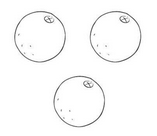

# **CODELAB**

**Untuk Modul ini diharapkan jangan menggunakan lambda, dikarenakan lambda akan dibahas di modul selanjutnya. jika tetap ingin menggunakan lambda, asisten tidak segan akan memberi pertanyaan mengenai lambda tersebut, yang pastinya akan mempengarui nilai pemahaman kalian**

*[Template laporan codelab](https://docs.google.com/document/d/1c4gK_gf-apqJiNuk8oANYyUf-xUhEN1tabk7qRp3jSk/edit?usp=sharing)*

## CODELAB 1

Diketahui sebuah data string:

In [ ]:
namaLengkap = "nama lengkap kalian" # huruf kecil semua

1. Gunakan list comprehension untuk mengambil huruf vokal atau konsonan dari namaLengkap.

In [ ]:
# TODO 1: Ambil huruf vokal (untuk NIM genap) atau konsonan (untuk NIM ganjil)
vokal = [.. for .. in namaLengkap if .. ]
konsonan = [.. for .. in namaLengkap if .. ]

In [ ]:
print(vokal)
print(konsonan)

['a', 'a', 'e', 'a', 'a', 'i', 'a']
['n', 'm', 'l', 'n', 'g', 'k', 'p', 'k', 'l', 'n']


2. Lengkapi fungsi transformasi double(x) berikut dan gunakan untuk memetakan variabel vokal/konsonan kalian menjadi data baru dan tampilkan dalam bentuk list untuk data vokal dan tuple untuk data konsonan!

In [ ]:
# TODO 2: Melengkapi fungsi sesuai deskripsi
'''
fungsi untuk mengubah nilai x menjadi 2x
pre-cond: x bisa sembarang data
post-cond: 2x
'''
def double(x):
    return # ...

# TODO 3: Gunakan fungsi double untuk memetakan data vokal/konsonan
new_data =    # vokal/konsonan, tergantung NIM


In [ ]:
#tampilkan hasil berupa tuple/list sesuai ketentuan soal

['aa', 'aa', 'ee', 'aa', 'aa', 'ii', 'aa']
('nn', 'mm', 'll', 'nn', 'gg', 'kk', 'pp', 'kk', 'll', 'nn')


3. Filter data

>Siapkan fungsi logika untuk digunakan dalam fungsi `filter()` bersamaan dengan data hasil map dengan tujuan untuk mengambil huruf tertentu (bebas sesuai NIM).


In [ ]:
# TODO 4: Definisikan fungsi logika untuk memilih huruf tertentu
'''
deskripsi fungsi
'''
def namaFungsi(parameter):
  return

# TODO 5: Penggunaan fungsi filter untuk memfilter data hasil map sebelumnya
hasil = filter()

In [ ]:
#contoh hasil filter vokal aa

('aa', 'aa', 'aa', 'aa', 'aa')


In [ ]:
#contoh hasil filter konsonan nn

['nn', 'nn', 'nn']

4. Gunakan fungsi `reduce()` dari modul functools untuk menghitung berapa kali huruf tertentu ('a' atau huruf lain sesuai NIM) muncul dalam daftar huruf vokal/konsonan.
>dilarang menggunakan data hasil filter.

In [ ]:
# TODO 6: Import reduce

# TODO 7: Definisikan fungsi reduce untuk menghitung jumlah huruf tertentu
def nama_fungsi(a, b):
    # logika penghitungan jumlah huruf tertentu
    # misal: tambahkan 1 jika huruf adalah 'a'
    return # ...

In [ ]:
# TODO 8: Gunakan reduce() untuk menghitung total kemunculan huruf
jumlahA = reduce(countA, ... )  # vokal atau konsonan

# contoh output
print("Jumlah huruf 'a':", jumlahA)

Jumlah huruf 'a': 6


## CODELAB 2


1. Buatlah sebuah fungsi rekursif bernama cek_palindrom(teks) yang digunakan untuk memeriksa apakah sebuah string termasuk palindrom atau tidak.
* Base case: jika panjang string ≤ 1, maka string tersebut palindrom.
* Recursive case: jika karakter pertama dan terakhir sama, periksa substring di dalamnya.

Jika ada karakter pertama dan terakhir yang berbeda, maka string bukan palindrom.

2. Ujilah fungsi tersebut dengan string berikut:
* "katak"
* "aku"
* "ada"

Tampilkan hasil berupa True jika string palindrom dan False jika bukan.

In [ ]:
#hasil dari data test

True
False
True


# **TUGAS**

## TUGAS 1

Melanjutkan project pada Modul 1 dan 2, sekarang kalian diminta untuk mengembangkan program kalian dengan mengimplementasikan konsep processing data sequence menggunakan list comprehension, nested list, map, filter, reduce, dan rekursif.

Ketentuan Tugas
1. Program tetap melanjutkan dari modul sebelumnya.
2. Tambahkan fitur baru atau modifikasi fitur yang sudah ada dengan menggunakan minimal 2 konsep yang dipelajari di modul ini, yaitu diantara list comprehension, nested list, map, filter, reduce, dan rekursif.
3. Dilarang menggunakan lambda. Gunakan pure function agar tetap sesuai paradigma fungsional. Implementasi fungsi deklaratif menjadi nilai tambah.
4. Jelaskan secara singkat alasan penggunaan fungsi atau data sequence yang dipilih (misalnya: kenapa pakai list comprehension untuk memproses data tertentu).

## TUGAS 2

### NIM Ganjil

Kamu bekerja pada sebuah perusahaan ekspedisi dan diberikan data pengiriman barang sebagai berikut:

In [ ]:
pengiriman = [
    {"resi": "A001", "berat": 2.5, "ongkir_perkg": 10000, "status": "Terkirim"},
    {"resi": "A002", "berat": 5, "ongkir_perkg": 12000, "status": "Dalam Proses"},
    {"resi": "A003", "berat": 1.2, "ongkir_perkg": 10000, "status": "Terkirim"},
    {"resi": "A004", "berat": 10, "ongkir_perkg": 9000, "status": "Terkirim"},
    {"resi": "A005", "berat": 0.5, "ongkir_perkg": 15000, "status": "Batal"},
    {"resi": "A006", "berat": 3.8, "ongkir_perkg": 11000, "status": "Dalam Proses"},
    {"resi": "A007", "berat": 7.2, "ongkir_perkg": 9500, "status": "Terkirim"},
    {"resi": "A008", "berat": 4.5, "ongkir_perkg": 10500, "status": "Terkirim"},
    {"resi": "A009", "berat": 6.0, "ongkir_perkg": 9800, "status": "Batal"},
    {"resi": "A010", "berat": 9.1, "ongkir_perkg": 8700, "status": "Terkirim"},
    {"resi": "A011", "berat": 2.0, "ongkir_perkg": 12500, "status": "Dalam Proses"},
    {"resi": "A012", "berat": 1.5, "ongkir_perkg": 14000, "status": "Terkirim"},
    {"resi": "A013", "berat": 8.3, "ongkir_perkg": 9200, "status": "Terkirim"},
    {"resi": "A014", "berat": 0.8, "ongkir_perkg": 16000, "status": "Batal"},
    {"resi": "A015", "berat": 5.6, "ongkir_perkg": 9900, "status": "Terkirim"}
]


Selanjutnya kamu diminta untuk mengolah data tersebut dengan skenario sbb:
1. Filter data pengiriman yang statusnya terkirim saja
2. Tambahkan informasi total ongkir pada data yang terkirim tadi (menggunakan map dengan rumus `berat * ongkir_perkg`)
3. Gunakan reduce untuk menghitung total pendapatan dari data total ongkir yang diperoleh sebelumnya
4. Siapkan data semua pengiriman yang tidak dibatalkan menggunakan list comprehension dan siapkan fungsi rekursif untuk menghitung total berat nya

> Setiap fungsi yang dibuat wajib berupa pure function. pastikan data asli 'pengiriman' tidak berubah

In [ ]:
#contoh output skenario 1

Data pengiriman yang berhasil terkirim:
{'resi': 'A001', 'berat': 2.5, 'ongkir_perkg': 10000, 'status': 'Terkirim'}
{'resi': 'A003', 'berat': 1.2, 'ongkir_perkg': 10000, 'status': 'Terkirim'}
{'resi': 'A004', 'berat': 10, 'ongkir_perkg': 9000, 'status': 'Terkirim'}
{'resi': 'A007', 'berat': 7.2, 'ongkir_perkg': 9500, 'status': 'Terkirim'}
{'resi': 'A008', 'berat': 4.5, 'ongkir_perkg': 10500, 'status': 'Terkirim'}
{'resi': 'A010', 'berat': 9.1, 'ongkir_perkg': 8700, 'status': 'Terkirim'}
{'resi': 'A012', 'berat': 1.5, 'ongkir_perkg': 14000, 'status': 'Terkirim'}
{'resi': 'A013', 'berat': 8.3, 'ongkir_perkg': 9200, 'status': 'Terkirim'}
{'resi': 'A015', 'berat': 5.6, 'ongkir_perkg': 9900, 'status': 'Terkirim'}


In [ ]:
#contoh output skenario 2

{'resi': 'A001', 'berat': 2.5, 'ongkir_perkg': 10000, 'status': 'Terkirim', 'total_ongkir': 25000.0}
{'resi': 'A003', 'berat': 1.2, 'ongkir_perkg': 10000, 'status': 'Terkirim', 'total_ongkir': 12000.0}
{'resi': 'A004', 'berat': 10, 'ongkir_perkg': 9000, 'status': 'Terkirim', 'total_ongkir': 90000}
{'resi': 'A007', 'berat': 7.2, 'ongkir_perkg': 9500, 'status': 'Terkirim', 'total_ongkir': 68400.0}
{'resi': 'A008', 'berat': 4.5, 'ongkir_perkg': 10500, 'status': 'Terkirim', 'total_ongkir': 47250.0}
{'resi': 'A010', 'berat': 9.1, 'ongkir_perkg': 8700, 'status': 'Terkirim', 'total_ongkir': 79170.0}
{'resi': 'A012', 'berat': 1.5, 'ongkir_perkg': 14000, 'status': 'Terkirim', 'total_ongkir': 21000.0}
{'resi': 'A013', 'berat': 8.3, 'ongkir_perkg': 9200, 'status': 'Terkirim', 'total_ongkir': 76360.0}
{'resi': 'A015', 'berat': 5.6, 'ongkir_perkg': 9900, 'status': 'Terkirim', 'total_ongkir': 55440.0}


In [ ]:
#contoh output skenario 3

474620.0

In [ ]:
#contoh output skenario 4

60.7

In [ ]:
#terakhir:
# cek data pengiriman asli [tidak boleh berubah]
pengiriman

[{'resi': 'A001', 'berat': 2.5, 'ongkir_perkg': 10000, 'status': 'Terkirim'},
 {'resi': 'A002', 'berat': 5, 'ongkir_perkg': 12000, 'status': 'Dalam Proses'},
 {'resi': 'A003', 'berat': 1.2, 'ongkir_perkg': 10000, 'status': 'Terkirim'},
 {'resi': 'A004', 'berat': 10, 'ongkir_perkg': 9000, 'status': 'Terkirim'},
 {'resi': 'A005', 'berat': 0.5, 'ongkir_perkg': 15000, 'status': 'Batal'},
 {'resi': 'A006',
  'berat': 3.8,
  'ongkir_perkg': 11000,
  'status': 'Dalam Proses'},
 {'resi': 'A007', 'berat': 7.2, 'ongkir_perkg': 9500, 'status': 'Terkirim'},
 {'resi': 'A008', 'berat': 4.5, 'ongkir_perkg': 10500, 'status': 'Terkirim'},
 {'resi': 'A009', 'berat': 6.0, 'ongkir_perkg': 9800, 'status': 'Batal'},
 {'resi': 'A010', 'berat': 9.1, 'ongkir_perkg': 8700, 'status': 'Terkirim'},
 {'resi': 'A011',
  'berat': 2.0,
  'ongkir_perkg': 12500,
  'status': 'Dalam Proses'},
 {'resi': 'A012', 'berat': 1.5, 'ongkir_perkg': 14000, 'status': 'Terkirim'},
 {'resi': 'A013', 'berat': 8.3, 'ongkir_perkg': 9200,

### NIM Genap

Anda bekerja di sebuah supermarket dan diminta untuk mengolah data transaksi pelanggan berikut secara fungsional:

In [ ]:
transaksi = [
    {"id": "T001", "pelanggan": "Faizal", "jumlah_item": 5, "harga_per_item": 20000, "status": "Lunas"},
    {"id": "T002", "pelanggan": "Zaky", "jumlah_item": 2, "harga_per_item": 15000, "status": "Belum Lunas"},
    {"id": "T003", "pelanggan": "Maylani", "jumlah_item": 10, "harga_per_item": 12000, "status": "Lunas"},
    {"id": "T004", "pelanggan": "Hakim", "jumlah_item": 1, "harga_per_item": 50000, "status": "Batal"},
    {"id": "T005", "pelanggan": "Adit", "jumlah_item": 4, "harga_per_item": 18000, "status": "Lunas"},
    {"id": "T006", "pelanggan": "Dimas", "jumlah_item": 8, "harga_per_item": 15000, "status": "Lunas"},
    {"id": "T007", "pelanggan": "Hisyam", "jumlah_item": 3, "harga_per_item": 25000, "status": "Belum Lunas"},
    {"id": "T008", "pelanggan": "Krisna", "jumlah_item": 6, "harga_per_item": 22000, "status": "Lunas"},
    {"id": "T009", "pelanggan": "Ahyad", "jumlah_item": 12, "harga_per_item": 11000, "status": "Lunas"},
    {"id": "T010", "pelanggan": "Wempy", "jumlah_item": 5, "harga_per_item": 30000, "status": "Batal"},
    {"id": "T011", "pelanggan": "Nara", "jumlah_item": 7, "harga_per_item": 17500, "status": "Belum Lunas"},
    {"id": "T012", "pelanggan": "Fia", "jumlah_item": 9, "harga_per_item": 20000, "status": "Lunas"},
    {"id": "T013", "pelanggan": "Radan", "jumlah_item": 3, "harga_per_item": 40000, "status": "Lunas"},
    {"id": "T014", "pelanggan": "Rahma", "jumlah_item": 10, "harga_per_item": 16000, "status": "Batal"},
    {"id": "T015", "pelanggan": "Yusuf", "jumlah_item": 4, "harga_per_item": 28000, "status": "Lunas"}
]


Selanjutnya kamu diminta untuk mengolah data tersebut dengan skenario berikut:
1. Filter semua transaksi yang statusnya lunas saja
2. Tambahkan informasi total belanja pada data yang lunas menggunakan map dengan rumus `jumlah_item * harga_per_item`
3. Gunakan reduce untuk menghitung total pendapatan dari data total belanja yang diperoleh sebelumnya
4. Siapkan data semua transaksi yang tidak dibatalkan menggunakan list comprehension dan siapkan fungsi rekursif untuk mengitung jumlah item nya

> Setiap fungsi yang dibuat wajib berupa pure function. pastikan data asli 'transaksi' tidak berubah


In [ ]:
#contoh output skenario 1

Transaksi yang lunas:
{'id': 'T001', 'pelanggan': 'Faizal', 'jumlah_item': 5, 'harga_per_item': 20000, 'status': 'Lunas'}
{'id': 'T003', 'pelanggan': 'Maylani', 'jumlah_item': 10, 'harga_per_item': 12000, 'status': 'Lunas'}
{'id': 'T005', 'pelanggan': 'Adit', 'jumlah_item': 4, 'harga_per_item': 18000, 'status': 'Lunas'}
{'id': 'T006', 'pelanggan': 'Dimas', 'jumlah_item': 8, 'harga_per_item': 15000, 'status': 'Lunas'}
{'id': 'T008', 'pelanggan': 'Krisna', 'jumlah_item': 6, 'harga_per_item': 22000, 'status': 'Lunas'}
{'id': 'T009', 'pelanggan': 'Ahyad', 'jumlah_item': 12, 'harga_per_item': 11000, 'status': 'Lunas'}
{'id': 'T012', 'pelanggan': 'Fia', 'jumlah_item': 9, 'harga_per_item': 20000, 'status': 'Lunas'}
{'id': 'T013', 'pelanggan': 'Radan', 'jumlah_item': 3, 'harga_per_item': 40000, 'status': 'Lunas'}
{'id': 'T015', 'pelanggan': 'Yusuf', 'jumlah_item': 4, 'harga_per_item': 28000, 'status': 'Lunas'}


In [ ]:
# skenario 2

{'id': 'T001', 'pelanggan': 'Faizal', 'jumlah_item': 5, 'harga_per_item': 20000, 'status': 'Lunas', 'total_belanja': 100000}
{'id': 'T003', 'pelanggan': 'Maylani', 'jumlah_item': 10, 'harga_per_item': 12000, 'status': 'Lunas', 'total_belanja': 120000}
{'id': 'T005', 'pelanggan': 'Adit', 'jumlah_item': 4, 'harga_per_item': 18000, 'status': 'Lunas', 'total_belanja': 72000}
{'id': 'T006', 'pelanggan': 'Dimas', 'jumlah_item': 8, 'harga_per_item': 15000, 'status': 'Lunas', 'total_belanja': 120000}
{'id': 'T008', 'pelanggan': 'Krisna', 'jumlah_item': 6, 'harga_per_item': 22000, 'status': 'Lunas', 'total_belanja': 132000}
{'id': 'T009', 'pelanggan': 'Ahyad', 'jumlah_item': 12, 'harga_per_item': 11000, 'status': 'Lunas', 'total_belanja': 132000}
{'id': 'T012', 'pelanggan': 'Fia', 'jumlah_item': 9, 'harga_per_item': 20000, 'status': 'Lunas', 'total_belanja': 180000}
{'id': 'T013', 'pelanggan': 'Radan', 'jumlah_item': 3, 'harga_per_item': 40000, 'status': 'Lunas', 'total_belanja': 120000}
{'id':

In [ ]:
# skenario 3

1088000

In [ ]:
# skenario 4

73

In [ ]:
#terakhir:
# cek data pengiriman asli [tidak boleh berubah]
transaksi

[{'id': 'T001',
  'pelanggan': 'Faizal',
  'jumlah_item': 5,
  'harga_per_item': 20000,
  'status': 'Lunas'},
 {'id': 'T002',
  'pelanggan': 'Zaky',
  'jumlah_item': 2,
  'harga_per_item': 15000,
  'status': 'Belum Lunas'},
 {'id': 'T003',
  'pelanggan': 'Maylani',
  'jumlah_item': 10,
  'harga_per_item': 12000,
  'status': 'Lunas'},
 {'id': 'T004',
  'pelanggan': 'Hakim',
  'jumlah_item': 1,
  'harga_per_item': 50000,
  'status': 'Batal'},
 {'id': 'T005',
  'pelanggan': 'Adit',
  'jumlah_item': 4,
  'harga_per_item': 18000,
  'status': 'Lunas'},
 {'id': 'T006',
  'pelanggan': 'Dimas',
  'jumlah_item': 8,
  'harga_per_item': 15000,
  'status': 'Lunas'},
 {'id': 'T007',
  'pelanggan': 'Hisyam',
  'jumlah_item': 3,
  'harga_per_item': 25000,
  'status': 'Belum Lunas'},
 {'id': 'T008',
  'pelanggan': 'Krisna',
  'jumlah_item': 6,
  'harga_per_item': 22000,
  'status': 'Lunas'},
 {'id': 'T009',
  'pelanggan': 'Ahyad',
  'jumlah_item': 12,
  'harga_per_item': 11000,
  'status': 'Lunas'},
 {

# Rubrik Penilaian

| Komponen Penilaian       | Bobot (%) |
| ------------------------ | --------- |
| ***Codelab***       | **15**    |
| ***Tugas 1***            |           |
| - Code/Kelengkapan fitur | 15        |
| - Originalitas Kode      | 5        |
| - Pemahaman      | 20        |
| ***Tugas 2***           |           |
| - Code/Kelengkapan Fitur | 15        |
| - Originalitas Kode      | 10        |
| - Pemahaman         | 20        |
| **Total Akhir**          | **100**   |


\*)Note: Program Identik berarti program sama persis dengan praktikan lain sehingga yang dinilai hanya pemahaman terhadap materi (code tidak mendapat bobot nilai sama sekali).


> Detail lengkap penilaian silahkan mengacu pada dokumen modul (pdf)
